<a href="https://colab.research.google.com/github/team-18ssv/Team--18-Triangulation-Fraud/blob/main/WalmartTeam18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore') #ignores warnings

**Importing the dataset**

In [ ]:
dataset = pd.read_csv('card_transdata.csv')
dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,cash_on_delivery,return_policy,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [ ]:
dataset['fraud'].value_counts()

0    912597
1     87403
Name: fraud, dtype: int64

**Dataset Summary**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   cash_on_delivery                1000000 non-null  int64  
 5   return_policy                   1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [ ]:
features = dataset[['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer', 'cash_on_delivery', 'return_policy', 'online_order']]
target = dataset['fraud']
labels = dataset['fraud']

<Axes: >

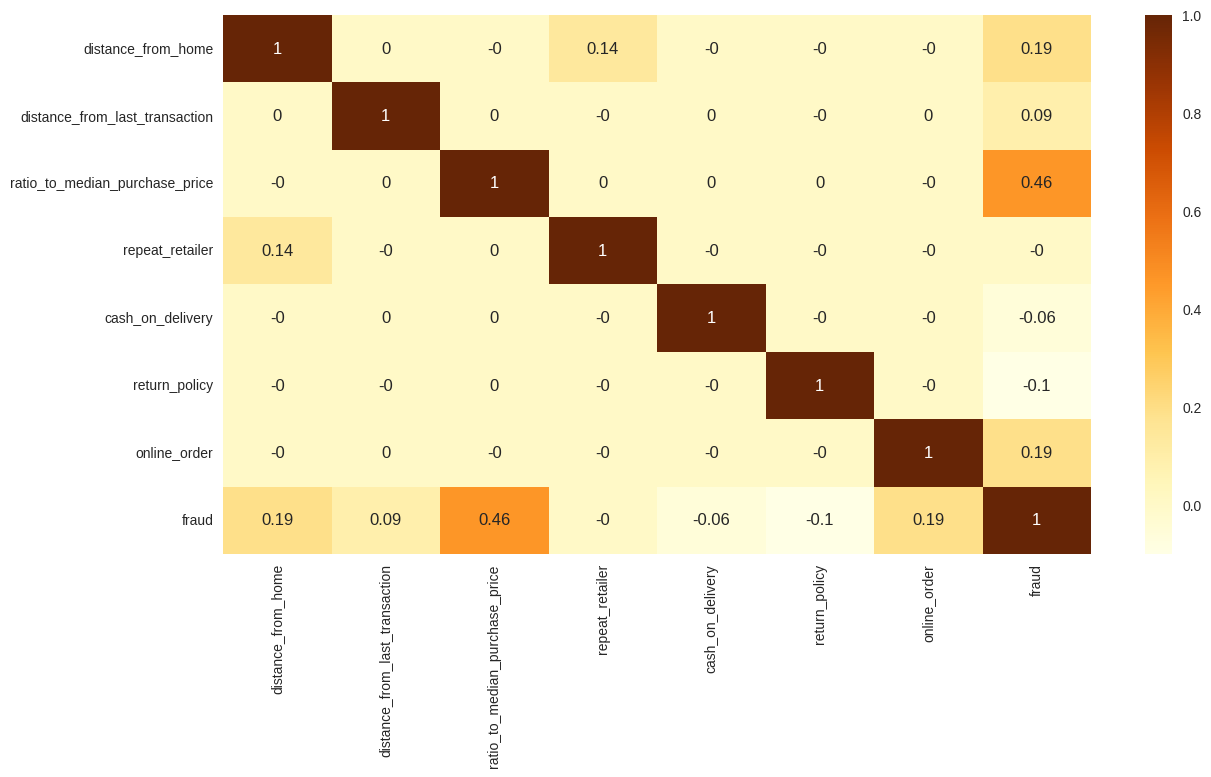

In [ ]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

**Bivariate Analysis**

<Axes: xlabel='fraud', ylabel='count'>

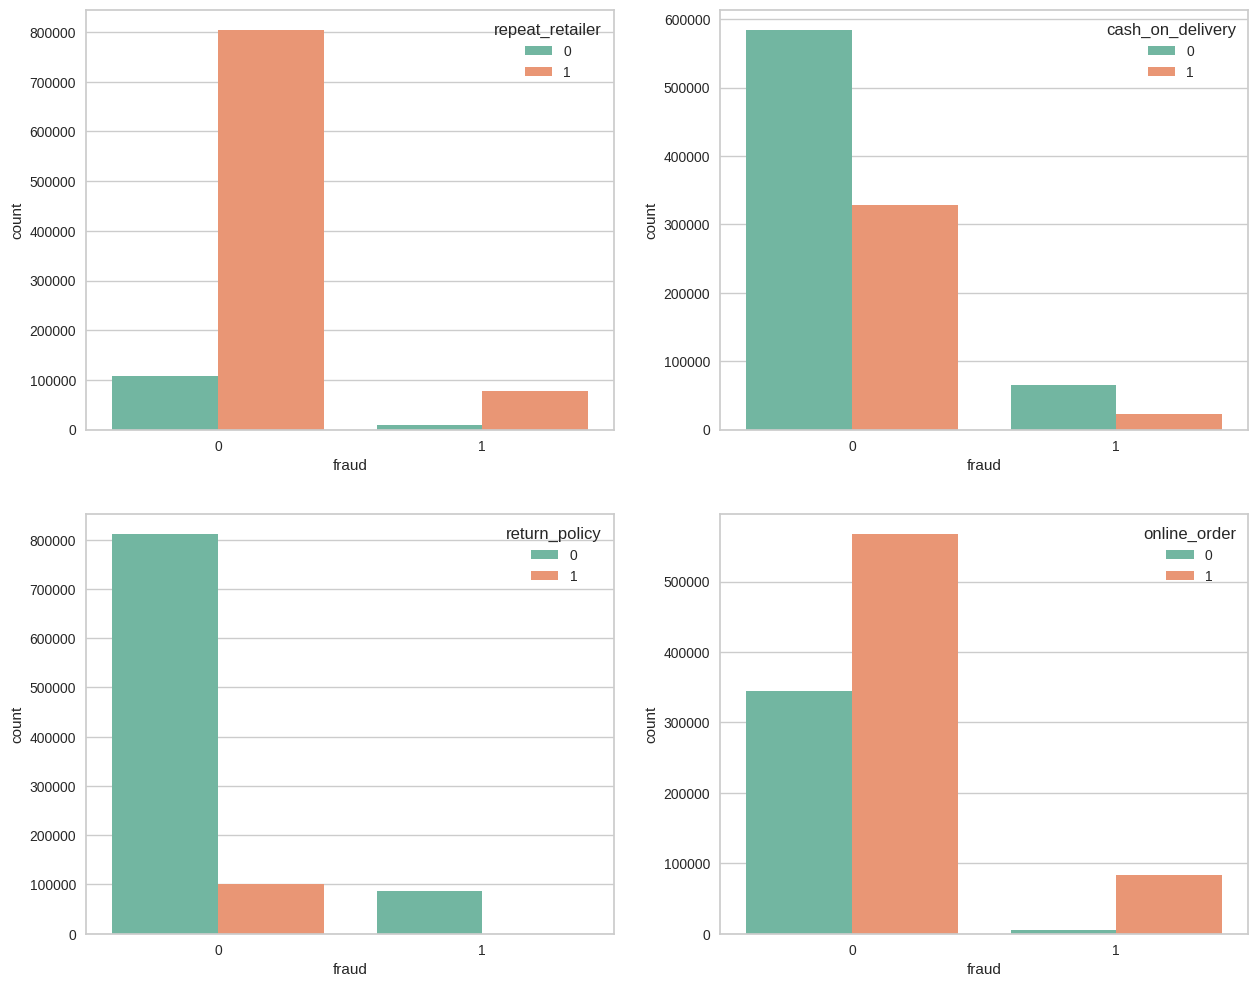

In [ ]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
sns.countplot(x = 'fraud', hue= 'repeat_retailer', palette='Set2', data = dataset)

plt.subplot(2,2,2)
sns.countplot(x = 'fraud', hue= 'cash_on_delivery', palette='Set2', data = dataset)

plt.subplot(2,2,3)
sns.countplot(x = 'fraud', hue= 'return_policy', palette='Set2', data = dataset)

plt.subplot(2,2,4)
sns.countplot(x = 'fraud', hue= 'online_order', palette='Set2', data = dataset)



**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                            Specs         Score
0              distance_from_home  5.649520e+06
1  distance_from_last_transaction  1.120338e+06
2  ratio_to_median_purchase_price  9.182831e+05
6                    online_order  1.287836e+04
5                   return_policy  9.046618e+03
4                cash_on_delivery  2.415153e+03
3                 repeat_retailer  2.182902e-01


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

**Model Building**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [ ]:
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)


In [ ]:
print("DecisionTrees's Accuracy is: ", x*100)
from sklearn.metrics import f1_score
print("DecisionTrees's f1 score is: ", f1_score(Ytest, predicted_values, average="micro"))
print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  99.908
DecisionTrees's f1 score is:  0.99908
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182430
         1.0       0.99      1.00      0.99     17570

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



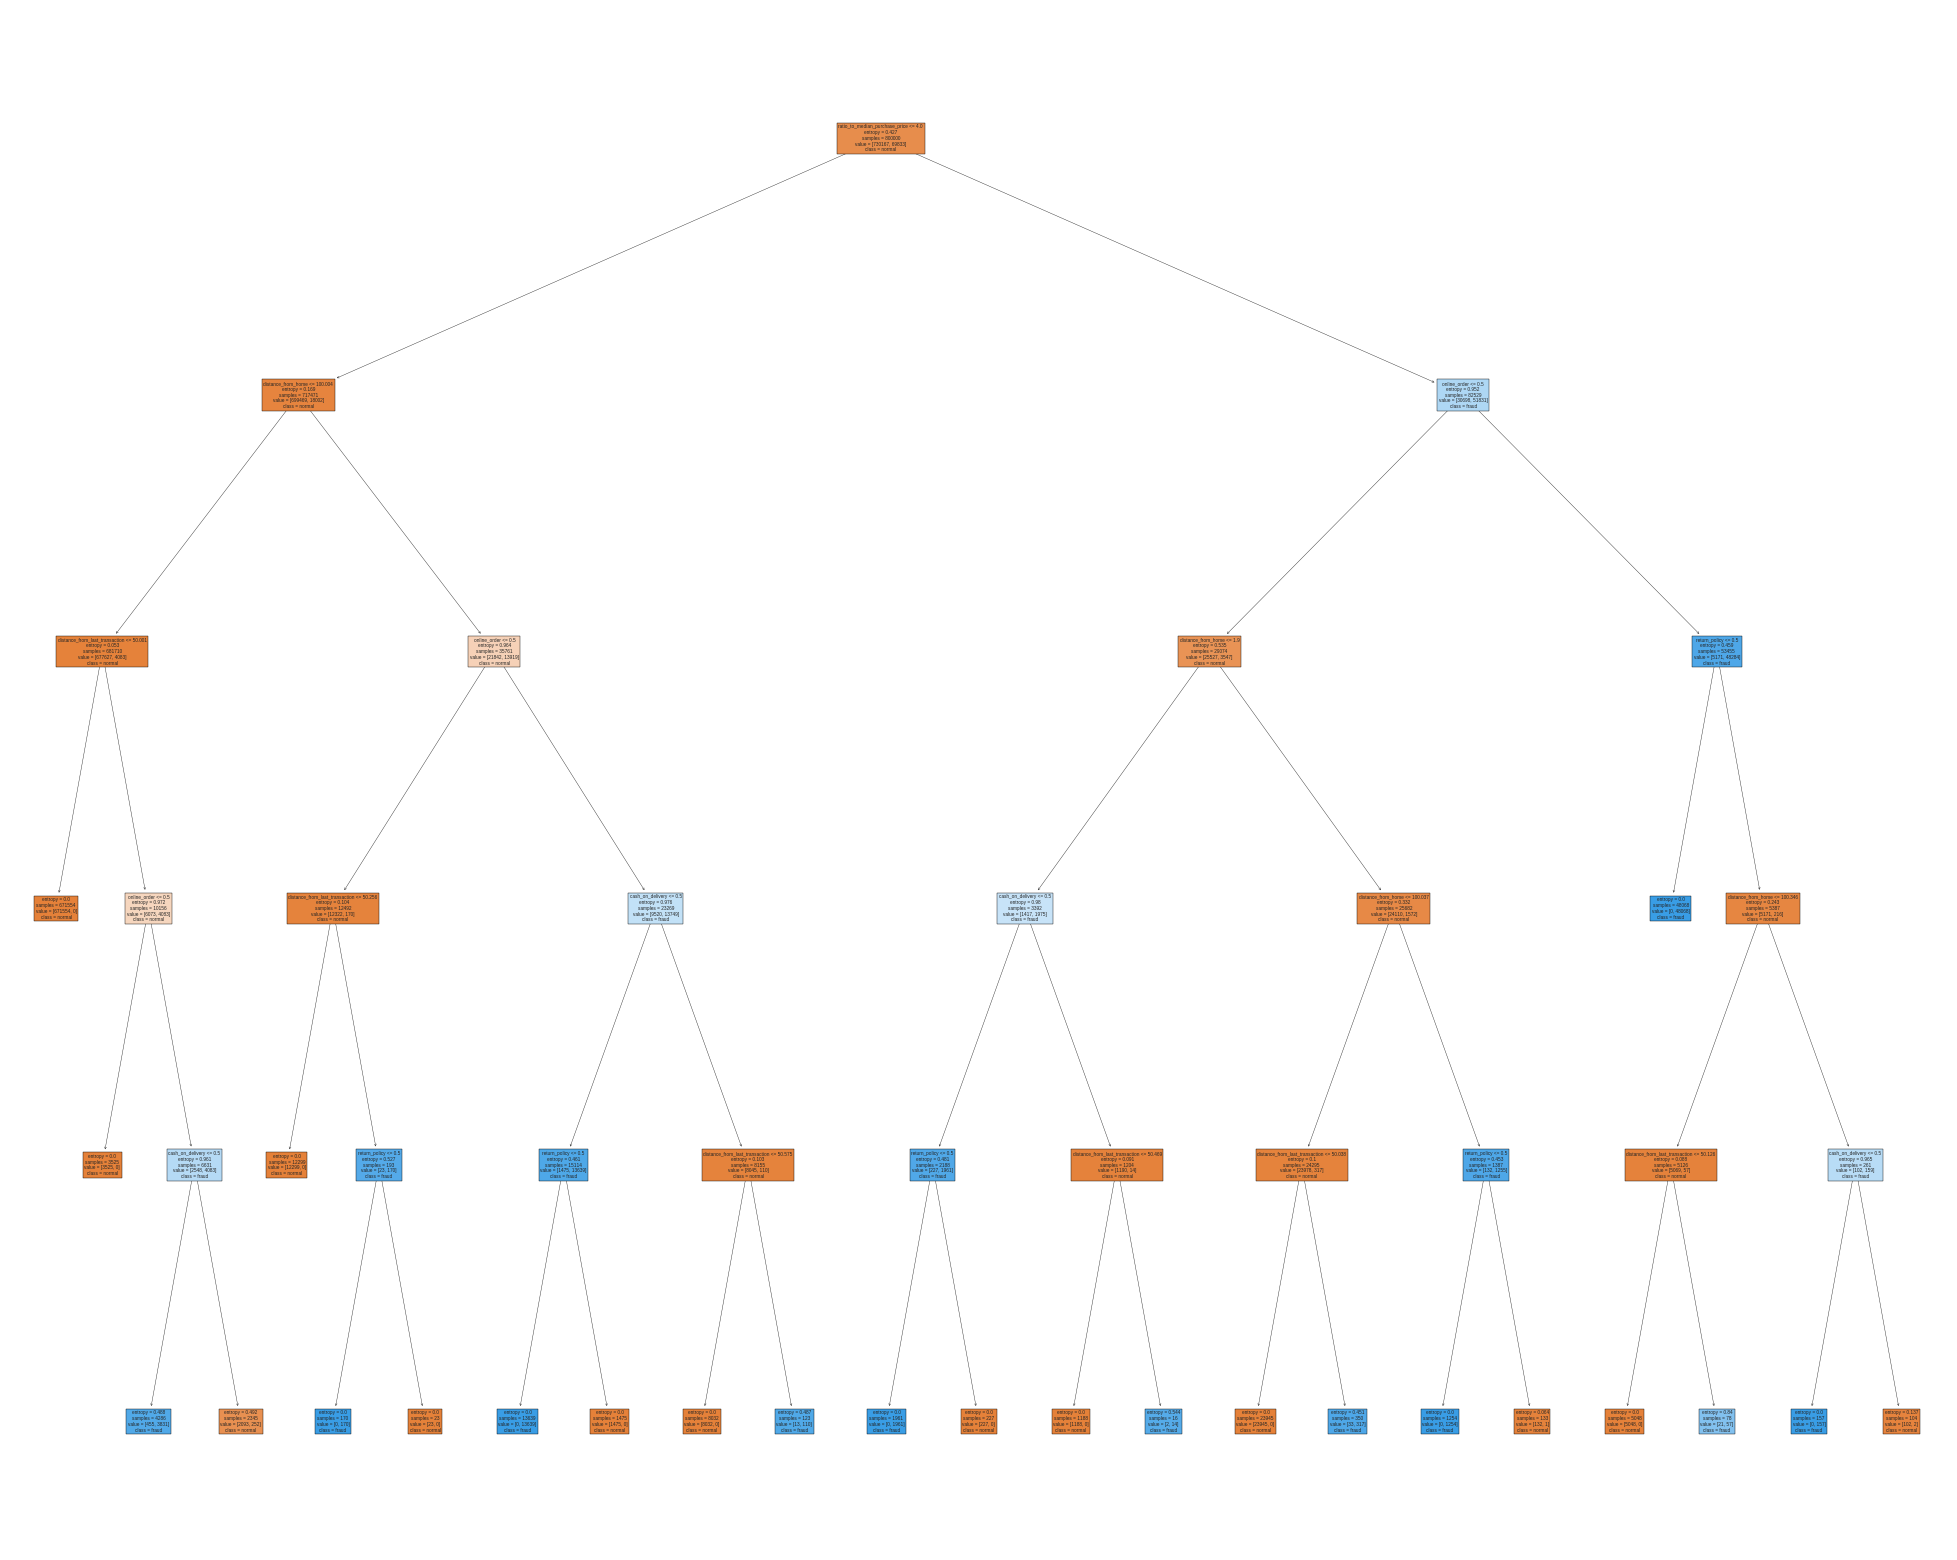

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DecisionTree, feature_names=dataset.columns[:-1], class_names=['normal', 'fraud'], filled=True);

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)


LogisticRegression(random_state=2)

In [ ]:
predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  95.856
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182430
         1.0       0.90      0.60      0.72     17570

    accuracy                           0.96    200000
   macro avg       0.93      0.79      0.85    200000
weighted avg       0.96      0.96      0.95    200000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.9995
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182430
         1.0       1.00      1.00      1.00     17570

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



**Prediction**

In [ ]:
data = np.array([[14.2635, 0.1587, 1.136, 1, 1, 0, 1]])
prediction = RF.predict(data)
print(prediction)

[0.]


In [ ]:
data = np.array([[3.80, 67.24, 1.87, 1, 0, 0, 1]])
prediction = RF.predict(data)
print(prediction)

[1.]


In [ ]:
data = np.array([[3.80, 67.24, 1.87, 1, 0, 0, 1]])
prediction = RF.predict(data)
print(prediction)

[1.]
